In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r'D:\itvedant\Vscode\insurancePrediction_classification.csv')

In [4]:
df.head(2)

,Emp_id,Age,Employment Type,GraduateOrNot,AnnualIncome,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,111,31,Government Sector,Yes,400000,No,No,0
1,112,31,Private Sector/Self Employed,Yes,1250000,No,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Emp_id               1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FrequentFlyer        1987 non-null   object
 6   EverTravelledAbroad  1987 non-null   object
 7   TravelInsurance      1987 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 124.3+ KB


In [6]:
df['Employment Type']=df['Employment Type'].replace('Private Sector/Self Employed','Private')

In [7]:
df['Employment Type']=df['Employment Type'].replace('Government Sector','Government')

In [8]:
df.head(2)

,Emp_id,Age,Employment Type,GraduateOrNot,AnnualIncome,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,111,31,Government,Yes,400000,No,No,0
1,112,31,Private,Yes,1250000,No,No,0


In [9]:
df.shape

(1987, 8)

In [10]:
df.isnull().sum()

Emp_id                 0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
cat_col=df.select_dtypes("object")
num_col=df.select_dtypes("int64",'float64')

In [13]:
cat_col.head(2)

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government,Yes,No,No
1,Private,Yes,No,No


In [14]:
num_col.head(2)

,Emp_id,Age,AnnualIncome,TravelInsurance
0,111,31,400000,0
1,112,31,1250000,0


In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
le=LabelEncoder()

In [18]:
for col in cat_col:
    df[col]=le.fit_transform(df[[col]])

In [19]:
df.head(2)

,Emp_id,Age,Employment Type,GraduateOrNot,AnnualIncome,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,111,31,0,1,400000,0,0,0
1,112,31,1,1,1250000,0,0,0


In [20]:
x=df.drop('TravelInsurance',axis=1)
y=df['TravelInsurance']

In [21]:
df.head(2)

,Emp_id,Age,Employment Type,GraduateOrNot,AnnualIncome,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,111,31,0,1,400000,0,0,0
1,112,31,1,1,1250000,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [24]:
x_test.shape

(398, 7)

In [25]:
x_train.shape

(1589, 7)

In [26]:
y_test.shape

(398,)

In [27]:
y_train.shape

(1589,)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lgr=LogisticRegression()

In [30]:
df['Employment Type'].unique()

array([0, 1])

In [31]:
df.head(2)

,Emp_id,Age,Employment Type,GraduateOrNot,AnnualIncome,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,111,31,0,1,400000,0,0,0
1,112,31,1,1,1250000,0,0,0


In [32]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [33]:
lgr.score(x_test,y_test)

0.7663316582914573

In [34]:
lgr.score(x_train,y_train)

0.7665198237885462

In [35]:
y_pred=lgr.predict(x_test)

In [36]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
y_pred_prob=lgr.predict_proba(x_test)

In [38]:
print(y_pred[0:10])

[0 1 1 0 1 0 0 0 0 0]


In [39]:
print(y_pred[0:10][:0])

[]


In [40]:
print(y_pred_prob[0:10])

[[0.77669456 0.22330544]
 [0.22934328 0.77065672]
 [0.30168686 0.69831314]
 [0.86715672 0.13284328]
 [0.16731715 0.83268285]
 [0.79585057 0.20414943]
 [0.63316562 0.36683438]
 [0.79229612 0.20770388]
 [0.82925265 0.17074735]
 [0.79766049 0.20233951]]


In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       257
           1       0.76      0.50      0.60       141

    accuracy                           0.77       398
   macro avg       0.76      0.71      0.72       398
weighted avg       0.76      0.77      0.75       398



In [43]:
fpr(false prediction ratio)=fp/fp+tn
tpr(true prediction ratio)=

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3799376320.py, line 1)

In [ ]:
prob=lgr.predict_proba(x_test)[:,1]
print(prob)

[0.22330544 0.77065672 0.69831314 0.13284328 0.83268285 0.20414943
 0.36683438 0.20770388 0.17074735 0.20233951 0.78267486 0.18383949
 0.16082768 0.48235073 0.17674561 0.24369545 0.21723556 0.17469969
 0.36882618 0.18275988 0.38431427 0.20450534 0.18490971 0.12819582
 0.34381197 0.13482006 0.4807719  0.22966371 0.22937843 0.33682413
 0.41497249 0.20979581 0.86824221 0.21726351 0.55173093 0.23607971
 0.32108715 0.31959616 0.32137383 0.33134787 0.35054232 0.71424621
 0.13973039 0.16405149 0.14896343 0.397277   0.36210681 0.73267968
 0.73522298 0.19844259 0.12173494 0.22194633 0.23181537 0.72569859
 0.21376901 0.69243532 0.22788127 0.3178205  0.19343093 0.19175591
 0.19106397 0.19170674 0.19768546 0.17396523 0.3965538  0.74346178
 0.71348318 0.1563476  0.30631958 0.72126064 0.38940215 0.1704553
 0.20807797 0.22016949 0.83749966 0.21089237 0.8723271  0.38061374
 0.23559535 0.69653785 0.35132471 0.14587019 0.53915941 0.16811537
 0.86852613 0.31953168 0.39961035 0.20940252 0.86411008 0.37745

In [ ]:
threshold=[0.3,0.4,0.5,0.6,0.7]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
fprs=[]
tprs=[]
for x in threshold:
    y_pred1=np.where(prob>=x,1,0)
    tn,fp,fn,tp=confusion_matrix(y_test,y_pred1).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    fprs.append(fpr)
    tprs.append(tpr)

In [ ]:
fprs

[0.377431906614786,
 0.14396887159533073,
 0.08949416342412451,
 0.058365758754863814,
 0.0311284046692607]

In [ ]:
tprs

[0.6312056737588653,
 0.5319148936170213,
 0.5035460992907801,
 0.475177304964539,
 0.41134751773049644]

In [ ]:
from sklearn.metrics import confusion_matrix

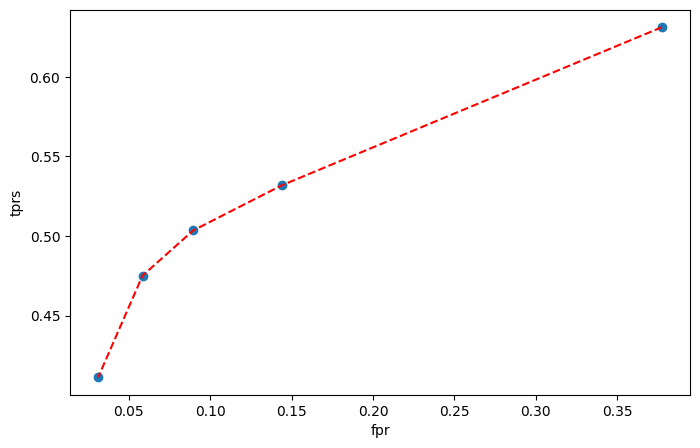

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(fprs,tprs,'--',c='r')
plt.scatter(fprs,tprs)
plt.xlabel('fpr')
plt.ylabel('tprs')
plt.show()